In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("fraud_oracle.csv")
df

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,...,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision
15416,Nov,5,Thursday,Pontiac,Urban,Friday,Dec,1,Male,Married,...,6 years,31 to 35,No,No,External,more than 5,no change,3 to 4,1996,Liability
15417,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,...,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision
15418,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,...,2 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils


In [3]:
df.describe(include=object)


,Month,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,Sex,MaritalStatus,Fault,PolicyType,...,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,BasePolicy
count,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420,...,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420
unique,12,7,19,2,8,13,2,4,2,9,...,4,8,9,2,2,2,4,5,5,3
top,Jan,Monday,Pontiac,Urban,Monday,Jan,Male,Married,Policy Holder,Sedan - Collision,...,2 to 4,7 years,31 to 35,No,No,External,none,no change,1 vehicle,Collision
freq,1411,2616,3837,13822,3757,1446,13000,10625,11230,5584,...,5485,5807,5593,14992,15333,15179,7047,14324,14316,5962


In [4]:
df.nunique()

Month                      12
WeekOfMonth                 5
DayOfWeek                   7
Make                       19
AccidentArea                2
DayOfWeekClaimed            8
MonthClaimed               13
WeekOfMonthClaimed          5
Sex                         2
MaritalStatus               4
Age                        66
Fault                       2
PolicyType                  9
VehicleCategory             3
VehiclePrice                6
FraudFound_P                2
PolicyNumber            15420
RepNumber                  16
Deductible                  4
DriverRating                4
Days_Policy_Accident        5
Days_Policy_Claim           4
PastNumberOfClaims          4
AgeOfVehicle                8
AgeOfPolicyHolder           9
PoliceReportFiled           2
WitnessPresent              2
AgentType                   2
NumberOfSuppliments         4
AddressChange_Claim         5
NumberOfCars                5
Year                        3
BasePolicy                  3
dtype: int

In [5]:
for i in df.columns.values.tolist():
    if df[i].dtypes==object:
        print(i,'=',df[i].unique())

Month = ['Dec' 'Jan' 'Oct' 'Jun' 'Feb' 'Nov' 'Apr' 'Mar' 'Aug' 'Jul' 'May' 'Sep']
DayOfWeek = ['Wednesday' 'Friday' 'Saturday' 'Monday' 'Tuesday' 'Sunday' 'Thursday']
Make = ['Honda' 'Toyota' 'Ford' 'Mazda' 'Chevrolet' 'Pontiac' 'Accura' 'Dodge'
 'Mercury' 'Jaguar' 'Nisson' 'VW' 'Saab' 'Saturn' 'Porche' 'BMW' 'Mecedes'
 'Ferrari' 'Lexus']
AccidentArea = ['Urban' 'Rural']
DayOfWeekClaimed = ['Tuesday' 'Monday' 'Thursday' 'Friday' 'Wednesday' 'Saturday' 'Sunday'
 '0']
MonthClaimed = ['Jan' 'Nov' 'Jul' 'Feb' 'Mar' 'Dec' 'Apr' 'Aug' 'May' 'Jun' 'Sep' 'Oct'
 '0']
Sex = ['Female' 'Male']
MaritalStatus = ['Single' 'Married' 'Widow' 'Divorced']
Fault = ['Policy Holder' 'Third Party']
PolicyType = ['Sport - Liability' 'Sport - Collision' 'Sedan - Liability'
 'Utility - All Perils' 'Sedan - All Perils' 'Sedan - Collision'
 'Utility - Collision' 'Utility - Liability' 'Sport - All Perils']
VehicleCategory = ['Sport' 'Utility' 'Sedan']
VehiclePrice = ['more than 69000' '20000 to 29000' '30000 to 39

In [5]:
for i in df.columns.values.tolist():
    if df[i].dtypes!=object:
        print(i,'=',df[i].unique())

WeekOfMonth = [5 3 2 4 1]
WeekOfMonthClaimed = [1 4 2 3 5]
Age = [21 34 47 65 27 20 36  0 30 42 71 52 28 61 38 41 32 40 63 31 45 60 39 55
 35 44 72 29 37 59 49 50 26 48 64 33 74 23 25 56 16 68 18 51 22 53 46 43
 57 54 69 67 19 78 77 75 80 58 73 24 76 62 79 70 17 66]
FraudFound_P = [0 1]
PolicyNumber = [    1     2     3 ... 15418 15419 15420]
RepNumber = [12 15  7  4  3 14  1 13 11 16  6  2  8  5  9 10]
Deductible = [300 400 500 700]
DriverRating = [1 4 3 2]
Year = [1994 1995 1996]


In [6]:
df.dtypes

Month                   object
WeekOfMonth              int64
DayOfWeek               object
Make                    object
AccidentArea            object
DayOfWeekClaimed        object
MonthClaimed            object
WeekOfMonthClaimed       int64
Sex                     object
MaritalStatus           object
Age                      int64
Fault                   object
PolicyType              object
VehicleCategory         object
VehiclePrice            object
FraudFound_P             int64
PolicyNumber             int64
RepNumber                int64
Deductible               int64
DriverRating             int64
Days_Policy_Accident    object
Days_Policy_Claim       object
PastNumberOfClaims      object
AgeOfVehicle            object
AgeOfPolicyHolder       object
PoliceReportFiled       object
WitnessPresent          object
AgentType               object
NumberOfSuppliments     object
AddressChange_Claim     object
NumberOfCars            object
Year                     int64
BasePoli

In [8]:
from collections import Counter
Counter([i for i in df.DayOfWeekClaimed .values.tolist()]).most_common()

[('Monday', 3757),
 ('Tuesday', 3375),
 ('Wednesday', 2951),
 ('Thursday', 2660),
 ('Friday', 2497),
 ('Saturday', 127),
 ('Sunday', 52),
 ('0', 1)]

In [9]:
df.DayOfWeekClaimed.replace(['0'],'Sunday',inplace=True)

In [10]:
from collections import Counter
Counter([i for i in df.MonthClaimed.values.tolist()]).most_common()

[('Jan', 1446),
 ('May', 1411),
 ('Mar', 1348),
 ('Oct', 1339),
 ('Jun', 1293),
 ('Feb', 1287),
 ('Nov', 1285),
 ('Apr', 1271),
 ('Sep', 1242),
 ('Jul', 1225),
 ('Dec', 1146),
 ('Aug', 1126),
 ('0', 1)]

In [11]:
df.MonthClaimed.replace(['0'],'Aug',inplace=True)

In [12]:
df.isnull().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

In [13]:
data1=df.drop(columns='FraudFound_P')
target=df.FraudFound_P
data1.groupby(target).mean()



,WeekOfMonth,WeekOfMonthClaimed,Age,PolicyNumber,RepNumber,Deductible,DriverRating,Year
FraudFound_P,,,,,,,,
0,2.792440,2.695799,39.956957,7733.351038,8.492033,407.511899,2.485756,1994.871491
1,2.728061,2.665222,38.265439,7351.592633,8.345612,410.725894,2.520043,1994.787649


c:\users\kumar sanjib ray\appdata\local\programs\python\python39\lib\site-packages\pandas\plotting\_matplotlib\core.py:337: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


<AxesSubplot:xlabel='Year'>

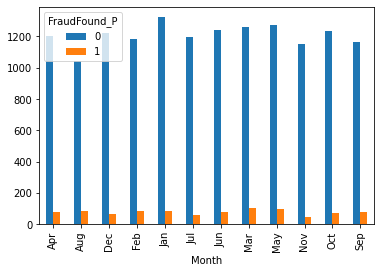

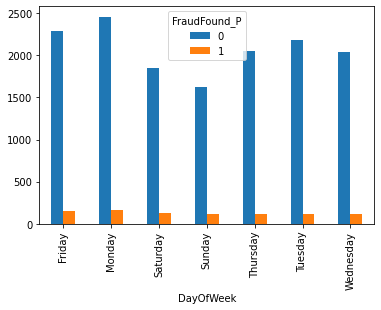

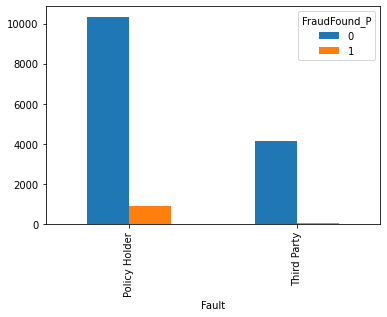

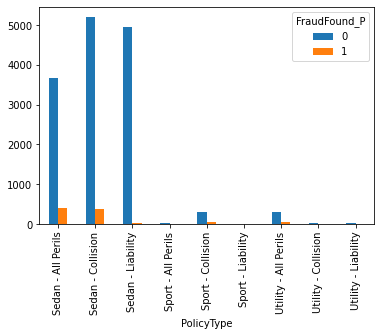

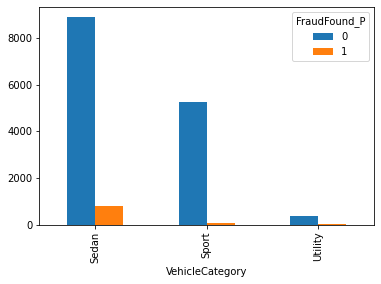

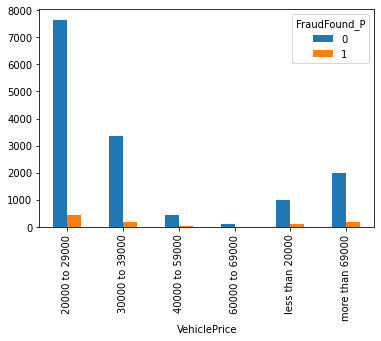

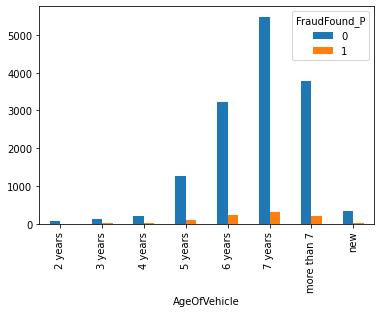

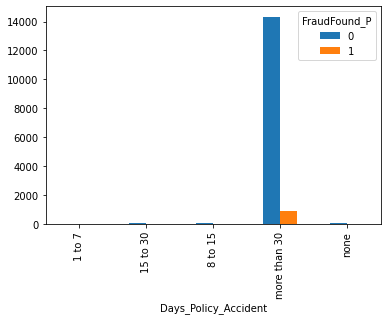

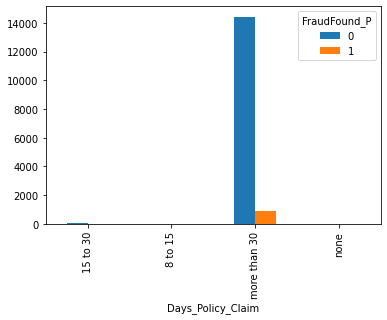

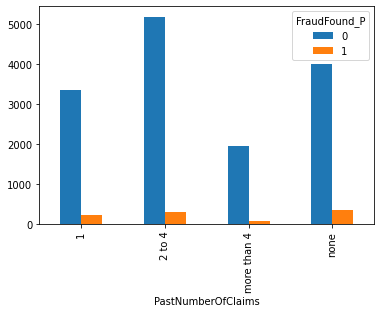

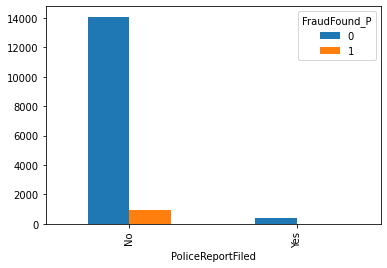

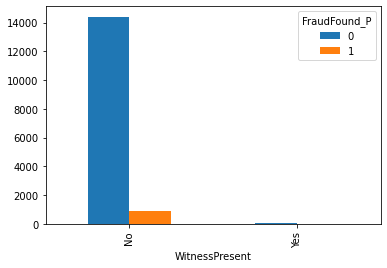

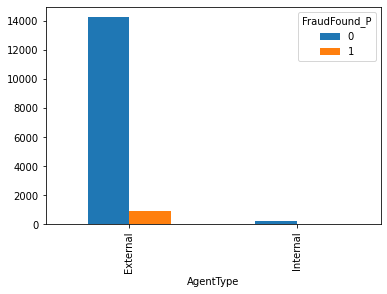

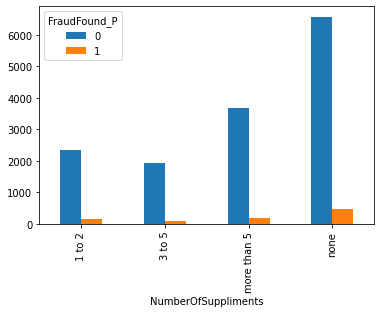

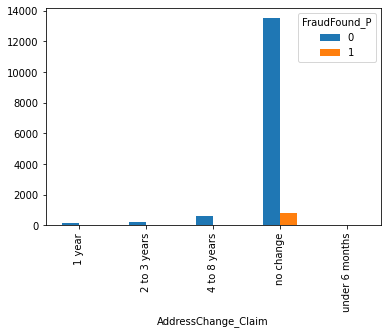

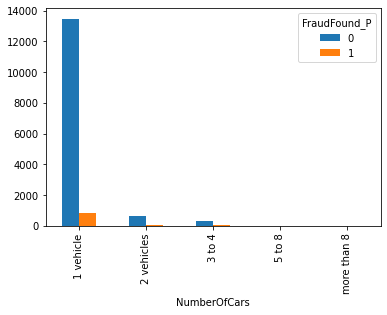

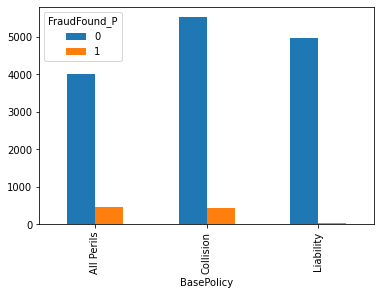

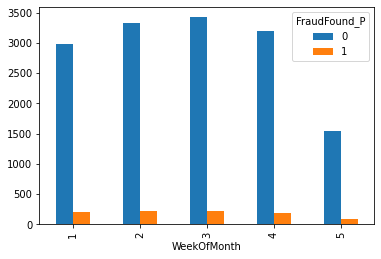

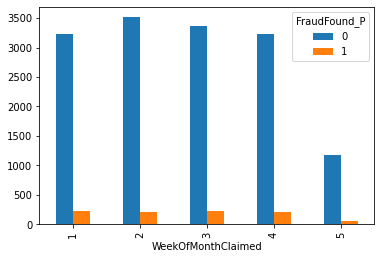

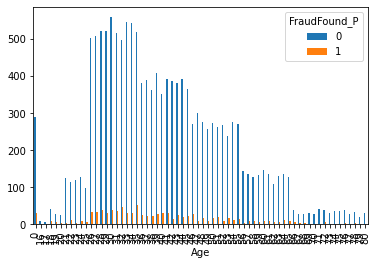

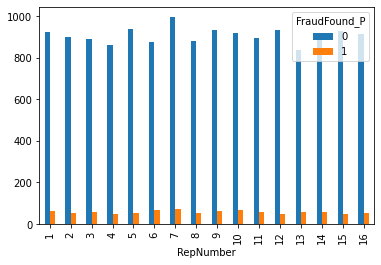

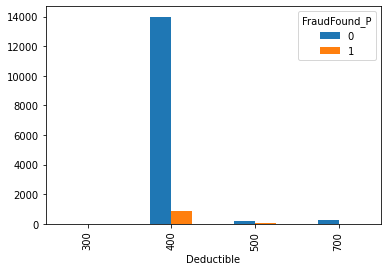

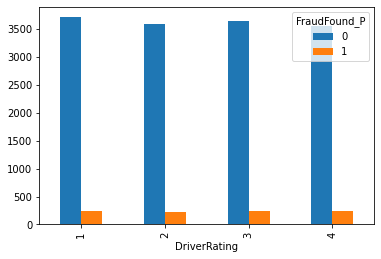

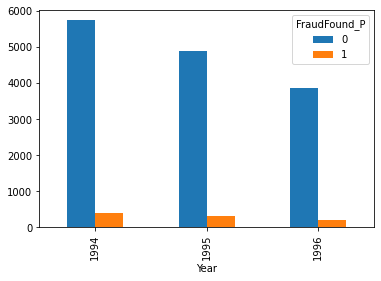

In [14]:
pd.crosstab(data1.Month,target).plot(kind='bar')
pd.crosstab(data1.DayOfWeek,target).plot(kind='bar')
pd.crosstab(data1.Fault,target).plot(kind='bar')
pd.crosstab(data1.PolicyType,target).plot(kind='bar')
pd.crosstab(data1.VehicleCategory,target).plot(kind='bar')
pd.crosstab(data1.VehiclePrice ,target).plot(kind='bar')
pd.crosstab(data1.AgeOfVehicle ,target).plot(kind='bar')
pd.crosstab(data1.Days_Policy_Accident ,target).plot(kind='bar')
pd.crosstab(data1.Days_Policy_Claim ,target).plot(kind='bar')
pd.crosstab(data1.PastNumberOfClaims ,target).plot(kind='bar')
pd.crosstab(data1.PoliceReportFiled,target).plot(kind='bar')
pd.crosstab(data1.WitnessPresent,target).plot(kind='bar')
pd.crosstab(data1.AgentType,target).plot(kind='bar')
pd.crosstab(data1.NumberOfSuppliments,target).plot(kind='bar')
pd.crosstab(data1.AddressChange_Claim,target).plot(kind='bar')
pd.crosstab(data1.NumberOfCars,target).plot(kind='bar')
pd.crosstab(data1.BasePolicy,target).plot(kind='bar')
pd.crosstab(data1.WeekOfMonth,target).plot(kind='bar')
pd.crosstab(data1.WeekOfMonthClaimed,target).plot(kind='bar')
pd.crosstab(data1.Age,target).plot(kind='bar')
pd.crosstab(data1.RepNumber,target).plot(kind='bar')
pd.crosstab(data1.Deductible,target).plot(kind='bar')
pd.crosstab(data1.DriverRating,target).plot(kind='bar')
pd.crosstab(data1.Year,target).plot(kind='bar')

In [16]:
#dummies of each object
for i in data1.columns.values.tolist():
    if data1[i].dtypes==object:
        cat_list=pd.get_dummies(data1[i],prefix=i,drop_first=True)
        data1=data1.join(cat_list)
        


In [17]:
for i in data1.columns.values.tolist():
    if data1[i].dtypes==object:
        data1.drop(i,axis=1,inplace=True)

c:\users\kumar sanjib ray\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='FraudFound_P', ylabel='count'>

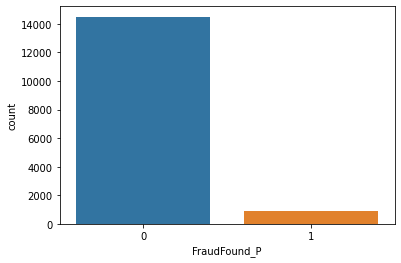

In [18]:
sns.countplot(target)

In [19]:
from imblearn.over_sampling import SMOTE
os=SMOTE(random_state=0)
print('data=',data1.shape)
os_data_X,os_data_y=os.fit_resample(data1,target)
print('new data=',os_data_X.shape)

data= (15420, 122)
new data= (28994, 122)


c:\users\kumar sanjib ray\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='FraudFound_P', ylabel='count'>

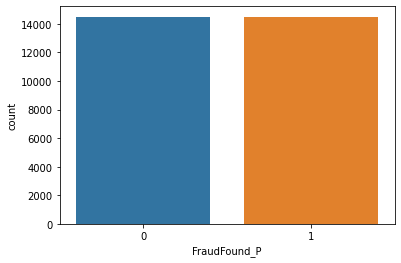

In [20]:
sns.countplot(os_data_y)

In [21]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [22]:
logreg = LogisticRegression(solver='liblinear',n_jobs=1)
rfe = RFE(estimator=logreg,n_features_to_select=20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False  True False False False False False False False False
  True False False False False False  True False False False False False
 False False False False False False False False False False False False
 False False False False False  True False False False False False False
 False False False False False False False False False False False False
 False False False False False False False  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False False
 False False False False False False False False False False False False
 False  True]
[ 95  90 101 103  97 102  94  99  80  84  82  83  88  68  81  69  93  76
  77  41  42  43  38  40  39  13   5   1  47   8   7  37  59   3  78   2
   1   6  44   9  10   4   1  56  22  28  27  20  21  23  79  32  64  72
  45  67  73  70  30  65  66  85  12 

In [24]:
l=rfe.support_.tolist()
_=os_data_X.columns.values.tolist()
cols_to_select=[]
for i in range(121):
  if l[i]==True:
    cols_to_select.append(_[i])

print(cols_to_select)       

['Make_Dodge', 'Make_Nisson', 'Make_VW', 'Fault_Third Party', 'AgeOfVehicle_3 years', 'AgeOfVehicle_4 years', 'AgeOfVehicle_5 years', 'AgeOfVehicle_6 years', 'AgeOfVehicle_7 years', 'AgeOfVehicle_more than 7', 'AgeOfVehicle_new', 'AgeOfPolicyHolder_18 to 20', 'AgeOfPolicyHolder_21 to 25', 'AgeOfPolicyHolder_26 to 30', 'AgeOfPolicyHolder_31 to 35', 'AgeOfPolicyHolder_36 to 40', 'AgeOfPolicyHolder_41 to 50', 'AgeOfPolicyHolder_51 to 65', 'AgeOfPolicyHolder_over 65']


In [25]:
X=os_data_X[cols_to_select]
y=os_data_y

In [27]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.539750
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:           FraudFound_P   No. Observations:                28994
Model:                          Logit   Df Residuals:                    28975
Method:                           MLE   Df Model:                           18
Date:                Fri, 24 Dec 2021   Pseudo R-squ.:                  0.2213
Time:                        23:52:58   Log-Likelihood:                -15650.
converged:                       True   LL-Null:                       -20097.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Make_Dodge                    -2.7315      0.719     -3.802      0.000      

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg.fit(X_train,y_train)

LogisticRegression(n_jobs=1, solver='liblinear')

In [32]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.92


In [33]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[4325   18]
 [ 636 3720]]


In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93      4343
           1       1.00      0.85      0.92      4356

    accuracy                           0.92      8699
   macro avg       0.93      0.92      0.92      8699
weighted avg       0.93      0.92      0.92      8699



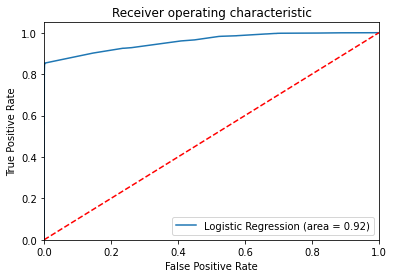

In [37]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)'% logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()